# ESERCIZIO 1 FEBBRAIO 2024

 E noto che il numero di pezzi guasti fabbricati in una giornata di lavoro di una catena di produzione A segue una distribuzione di Poisson di media 2.
 1. Quale la probabilit`a che in un giorno siano stati prodotti esattamente 3 pezzi guasti?
 2. Quale la probabilita che in un giorno siano stati prodotti tra 2 e 5 pezzi guasti (estremi inclusi)?
 Si mette in opera una nuova catena di produzione B. ` E noto che il numero di pezzi guasti fabbricati
 in una giornata di lavoro mediante B segue una distribuzione di Poisson di media 1.5.
 3. Si trovi la legge della variabile aleatoria che conta complessivemente il numero di pezzi guasti
 prodotti (cio`e provenienti indifferentemente da A o da B) e si calcoli la sua media e la sua
 varianza.
 4. Quale la probabilita che in un giorno siano stati prodotti complessivamente un numero di pezzi
 guasti compreso tra 3 e 6 (estremi inclusi)?

In [1]:
# 1

from scipy.stats import poisson

lam1=2
k=3

p = poisson.pmf(k,lam1)
print(p)
    




0.18044704431548356


In [2]:
#2

p2= sum([poisson.pmf(k,lam1) for k in range (2,6)])
print(p2)



0.5774305418095474


In [3]:
# B con media 1.5

lam2=1.5
k=3

p = poisson.pmf(k,lam2)
print(p)


0.12551071508349182


In [5]:
# 3
#da rivedere
# 3
lambdaB = 1.5
lambdaAB = lam1+ lam2
print("Media complessiva: ", lambdaAB)
print("Varianza complessiva: ", lambdaAB)

Media complessiva:  3.5
Varianza complessiva:  3.5


In [8]:
#4

p3= sum([poisson.pmf(k,lambdaAB) for k in range (3,7)])
print(p3)

0.6138647041089124


# ESERCIZIO 2

Il contenuto di sodio (in milligrammi) di 30 scatole di cereali `e riportato di seguito
 131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72,
 128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39,
 130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91,
 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65.
 1. Si calcoli la media campionaria, la deviazione standard e l’intervallo di confidenza per la media
 con livello di fiducia 0.01.
 2. Rappresentare graficamente i dati mediante un istogramma e mediante un box-plot.
 3. Si testi l’ipotesi che il contenuto medio di sodio sia di 130 mg utilizzando α = 0.05. Si calcoli il
 p-value del test precedente.
 4. è possibile affermare che il contenuto di sodio è distribuito normalmente nelle scatole? Giusti
f
 icare la risposta.

In [9]:
import numpy as np

X = np.array([ 131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72,
 128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39,
 130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91,
 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65])

print(X)

[131.15 130.69 130.91 129.54 129.64 128.77 130.72 128.33 128.24 129.65
 130.14 129.29 128.71 129.   129.39 130.42 129.53 130.12 129.78 130.92
 131.15 130.69 130.91 129.54 129.64 128.77 130.72 128.33 128.24 129.65]


In [10]:
#media campionaria
mu = np.mean(X)
print(mu)

#deviazione standard
S = np.std(X, ddof=1)
print(S)


129.75266666666664
0.9293599329955344


In [11]:
#intervallo di confidenza PER LA MEDIA con livello di fid al 99%
from scipy.stats import t

alpha=0.01
n=X.size

t=t.ppf(1-alpha/2,n-1)

Il=mu-S/np.sqrt(n)*t
Ir=mu+S/np.sqrt(n)*t

display(Il,Ir)

129.28497100877496

130.22036232455832

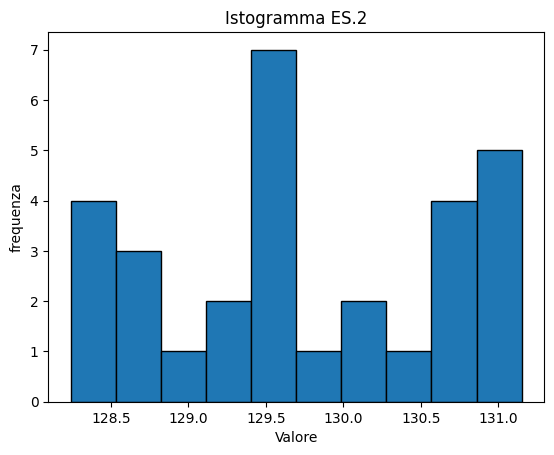

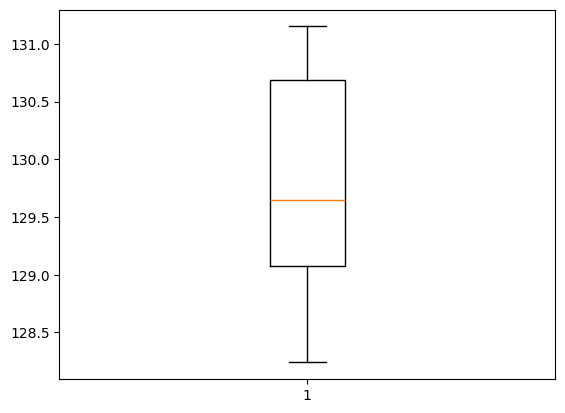

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

fig, ax = plt.subplots(1,1)

plt.hist(X, bins=10, edgecolor='black')
plt.title('Istogramma ES.2')
plt.xlabel('Valore')
plt.ylabel('frequenza')

plt.show()

plt.boxplot(X)

plt.show()


In [13]:
# 3
from scipy.stats import t
#ipotesi nulla H_0= 130 mg
mu_0=130
alpha=0.05

#calcolare il p-value

T_0=(mu-mu_0)/S*np.sqrt(n)

T= t.ppf(1-alpha/2,n-1)

print(T_0)
display(T)


-1.4576703931379382


2.045229642132703

In [14]:
#si rigetta l'ipotesi nulla perchè T_0 < t a favore della ipotesi alternativa 
from scipy.stats import t
import numpy as np
#calcolo p-value

p_value = 2 *(1-t.cdf(np.abs(T_0),n-1))
p_va=t.cdf(T_0,n-1)
print(p_value)
print(p_va)

0.15567636602235813
0.077838183011179


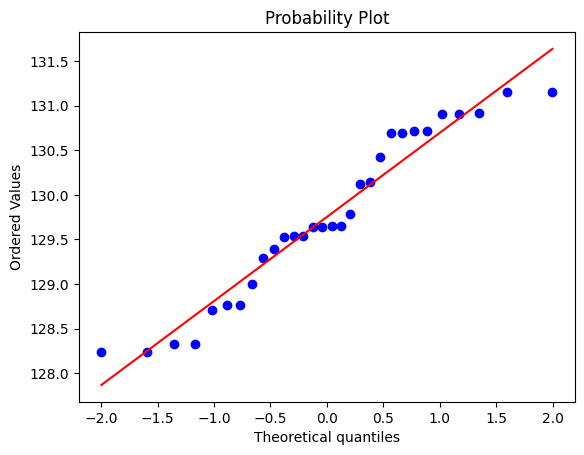

In [15]:
#4
from scipy.stats import norm
# il sodio è distribuito in modo normale nelle scatole?

fig, ax = plt.subplots(1,1)
probplot(X,dist=norm,plot=ax)
plt.show()

In [16]:
# i dati non seguono una distribuzione normale nella linea retta e quindi non è distribuito normalmente


# ESERCIZIO 3


Si consideri la catena di Markov sui vertici di un triangolo equilatero definita come segue. Ad ogni
 istante ci si puo spostare da un vertice a quello adiacente in senso orario con probabilita p e in senso
 antiorario con probabilita 1 − p, con 0 < p < 1.
 1. Determinare la matrice di transizione.
 2. Fissato p = 1/3 mostrare che la catena `e regolare.
 3. Fissato p = 1/3 determinare la distribuzione stazionaria.
 4. Indicato con E = {1,2,3} l’ins ieme degli stati, determinare il valore di p per cui la distribuzione
 uniforme su E sia reversibile.

In [22]:
import numpy as np

p = 1/3
P = np.zeros((3,3)) #matrice di transizione
for i in range(3): #per ogni vertice
      P[i][(i+1)%3] = p #senso orario
      P[i][(i-1)%3] = 1-p #senso antiorario
display(P)

#p=0.33

#1-p=0.66

array([[0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.66666667, 0.        ]])

In [23]:
P1=np.array([[0,p,1-p],[1-p,0,p],[p,1-p,0]])
display(np.dot(P1,P1))

array([[0.44444444, 0.44444444, 0.11111111],
       [0.11111111, 0.44444444, 0.44444444],
       [0.44444444, 0.11111111, 0.44444444]])

In [24]:
# è regolare perchè abbiamo elementi di P^2 tutti positivi

In [25]:
#calcoliamo la distribuzione stazionaria

#METODO ANALITICO

lam, V = np.linalg.eig(P1.T) #calcolo autovalori (lam) e autovettore(V) della trasposta di P1
display(lam)
display(V)


array([ 1. +0.j        , -0.5+0.28867513j, -0.5-0.28867513j])

array([[ 0.57735027+0.j ,  0.28867513-0.5j,  0.28867513+0.5j],
       [ 0.57735027+0.j ,  0.28867513+0.5j,  0.28867513-0.5j],
       [ 0.57735027+0.j , -0.57735027+0.j , -0.57735027-0.j ]])

In [26]:
v = np.real(V[:,0])/np.sum(np.real(V[:,0])) #calcolo la distribuzione stazionaria
display(v)

array([0.33333333, 0.33333333, 0.33333333])